In [369]:
import pandas as pd
import numpy as np
import seaborn as sns # For plots
import matplotlib.pyplot as plt #For plots
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
np.warnings.filterwarnings('ignore')
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score

In [2]:
concdf=pd.read_csv("concrete.csv")

In [3]:
concdf.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concdf.shape

(1030, 9)

In [5]:
concdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are 1030 records and 9 columns attributes in the dataset 7 of  type Float and 41 of type Int and Target attribute Strength of type Float.

In [6]:
dup=concdf.duplicated()
if sum(dup)==0:
    print("There are no duplicate records in the dataset")
else:
    print("There are {} duplicate records in the dataset".format(sum(dup)))

There are 25 duplicate records in the dataset


In [7]:
concdf_original=concdf.copy()
concdf.drop_duplicates(keep = 'first', inplace = True)
dup=concdf.duplicated()
if sum(dup)==0:
    print("There are no duplicate records in the dataset")
else:
    print("There are {} duplicate records in the dataset".format(sum(dup)))

There are no duplicate records in the dataset


In [8]:
concdf.shape

(1005, 9)

After duplicate removal the data set has 1005 rows.

In [9]:
concdf.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no Null values in the dataset.

In [10]:
attr=pd.DataFrame(concdf.columns.tolist(),columns = ['ColumnName'])
attr['ColumnDescription']=pd.Series(['measured in kg in a m3 mixture','measured in kg in a m3 mixture','measured in kg in a m3 mixture','measured in kg in a m3 mixture','measured in kg in a m3 mixture','measured in kg in a m3 mixture','measured in kg in a m3 mixture','day (1~365)','Concrete compressive strength measured in MPa'])
attr

,ColumnName,ColumnDescription
0,cement,measured in kg in a m3 mixture
1,slag,measured in kg in a m3 mixture
2,ash,measured in kg in a m3 mixture
3,water,measured in kg in a m3 mixture
4,superplastic,measured in kg in a m3 mixture
5,coarseagg,measured in kg in a m3 mixture
6,fineagg,measured in kg in a m3 mixture
7,age,day (1~365)
8,strength,Concrete compressive strength measured in MPa


All the Input variable except Age have the same measure of units. Target variable has unit MPa

In [11]:
concdf.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


Values in each column varies in wide range. Need to be scaled before passing to the model.

# Univariate Analysis


----------------------------------------cement----------------------------------------

Minimum cement : 102.0
Maximum cement : 540.0
Average cement : 278.631343283582


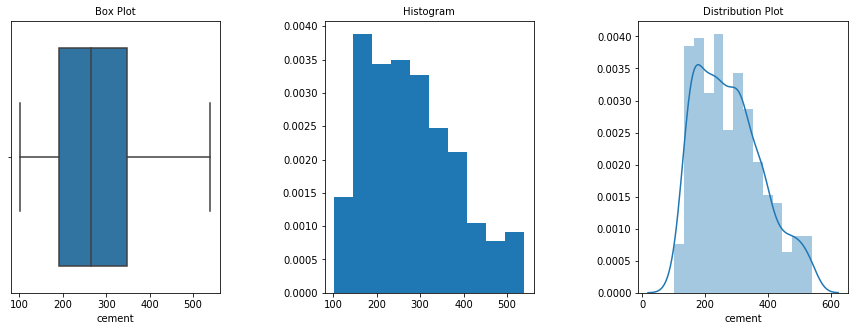

There are 0 outliers in the cement data

----------------------------------------slag----------------------------------------

Minimum slag : 0.0
Maximum slag : 359.4
Average slag : 72.04348258706466


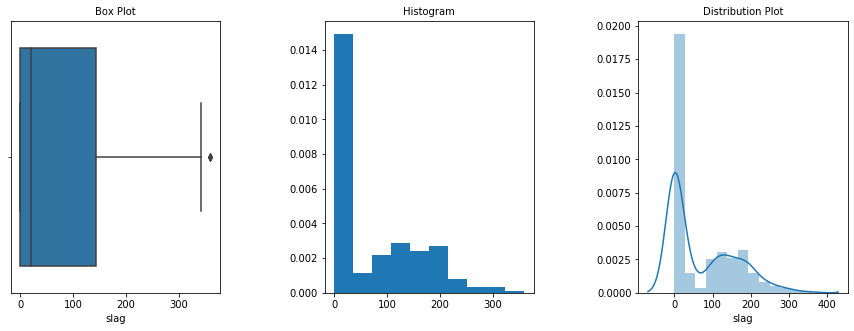

There are 2 outliers in the slag data

----------------------------------------ash----------------------------------------

Minimum ash : 0.0
Maximum ash : 200.1
Average ash : 55.53631840796018


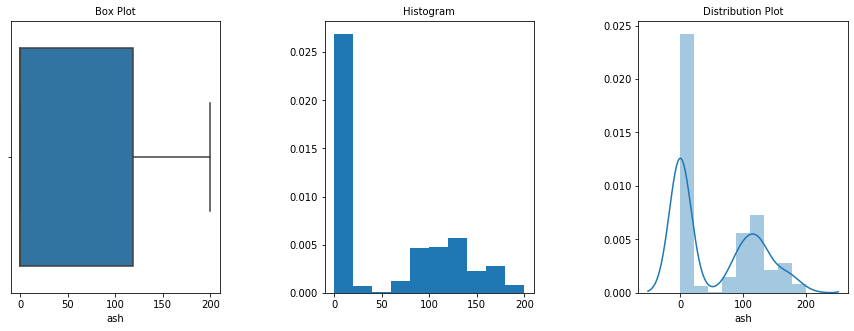

There are 0 outliers in the ash data

----------------------------------------water----------------------------------------

Minimum water : 121.8
Maximum water : 247.0
Average water : 182.07532338308457


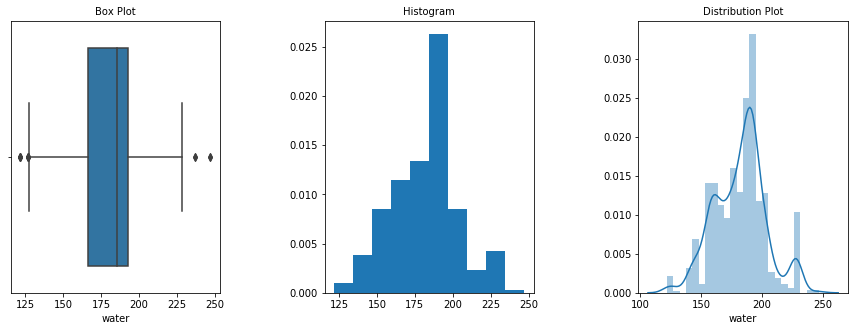

There are 15 outliers in the water data

----------------------------------------superplastic----------------------------------------

Minimum superplastic : 0.0
Maximum superplastic : 32.2
Average superplastic : 6.033233830845768


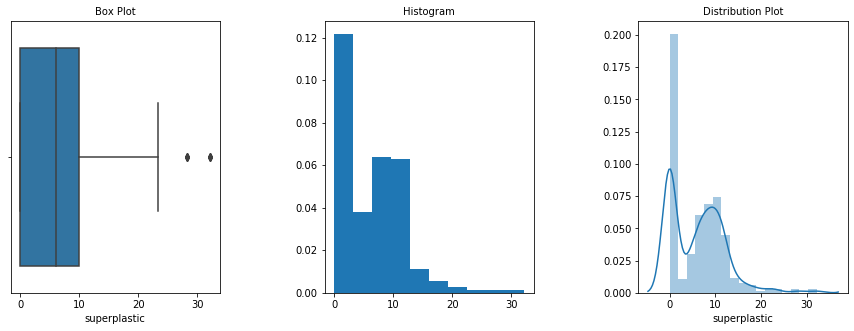

There are 10 outliers in the superplastic data

----------------------------------------coarseagg----------------------------------------

Minimum coarseagg : 801.0
Maximum coarseagg : 1145.0
Average coarseagg : 974.3768159203987


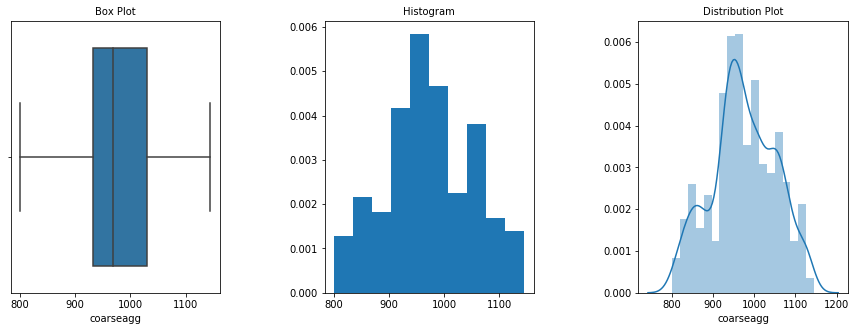

There are 0 outliers in the coarseagg data

----------------------------------------fineagg----------------------------------------

Minimum fineagg : 594.0
Maximum fineagg : 992.6
Average fineagg : 772.6882587064675


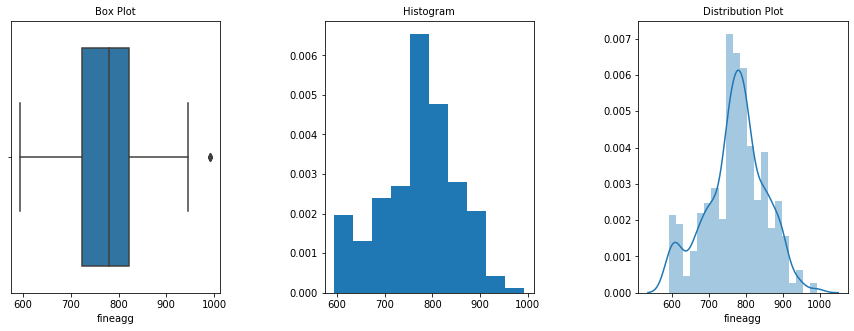

There are 5 outliers in the fineagg data

----------------------------------------age----------------------------------------

Minimum age : 1
Maximum age : 365
Average age : 45.85671641791045


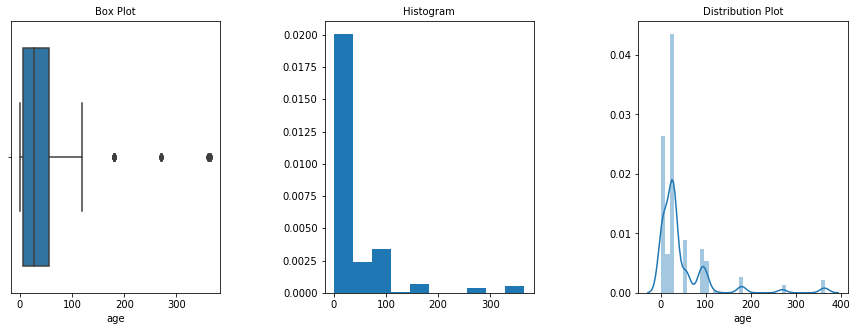

There are 59 outliers in the age data


In [12]:
for name in concdf.drop('strength',axis=1).columns.tolist():
    print('\n----------------------------------------{}----------------------------------------\n'.format(name))
    print('Minimum {} : {}'.format(name,concdf[name].min()))
    print('Maximum {} : {}'.format(name,concdf[name].max()))
    print('Average {} : {}'.format(name,concdf[name].mean()))
    Q3=concdf[name].quantile(q=0.75)
    Q1=concdf[name].quantile(q=0.25)
    IQR=Q3-Q1
    ol=np.count_nonzero(concdf[name]<(Q1-1.5*IQR)) + np.count_nonzero(concdf[name]>(Q3+1.5*IQR))
    fig = plt.figure(figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = fig.add_subplot(131)
    ax1.set_title('Box Plot', fontsize=10)
    sns.boxplot(concdf[name])
    ax2 = fig.add_subplot(132)
    ax2.set_title('Histogram', fontsize=10)
    plt.hist(concdf[name],density=True)
    ax3=fig.add_subplot(1,3,3)
    ax3.set_title('Distribution Plot', fontsize=10)
    sns.distplot(concdf[name])
    plt.show()
    print('There are {} outliers in the {} data'.format(ol,name))

1. Cement attribute data vary from 102 to 540 with average value of 278. There are no outliners in the data. Most records in  
   the data set are from range 150-200.
2. Slag attribute data vary from 0 to 359.4 with average value of 72. There are 2 outliners in the data and data is left  
   skewed.Most records in the data set are from range 100-150.
3. Ash attribute data vary from 0 to 200 with average value of 55. There are no outliners in the data and data is left 
   skewed.Most records in the data set are from range 100-125.
4. Water attribute data vary from 121.8 to 247 with average value 182. There are 15 outliners in the data.Most records in the 
   data set are from range 190-200.
5. Superplastic attribute data vary from 0 to 32.2 with average value of 6. There are 10 outliners in the data and data is left 
   skewed.Most records in the data set are from range 9-12.
6. Coarseagg attribute data vary from 801 to 1145 with average value of 974. There are no outliners in the data.Most records in 
   the data set are from range 920-950.
7. Fineagg attribute data vary from 594 to 992.6 with average value of 772. There are 5 outliners in the data.Most records in 
   the data set are from range 750-800.
8. Age attribute data vary from 1 to 365 with average value of 45. There are 59 outliners in the data.Most records in the 
   data set are from range 50-100.
9. Strength Category range from 2.33 to 82.6. Most records in the data set are from range 35-40.

Bi Variate

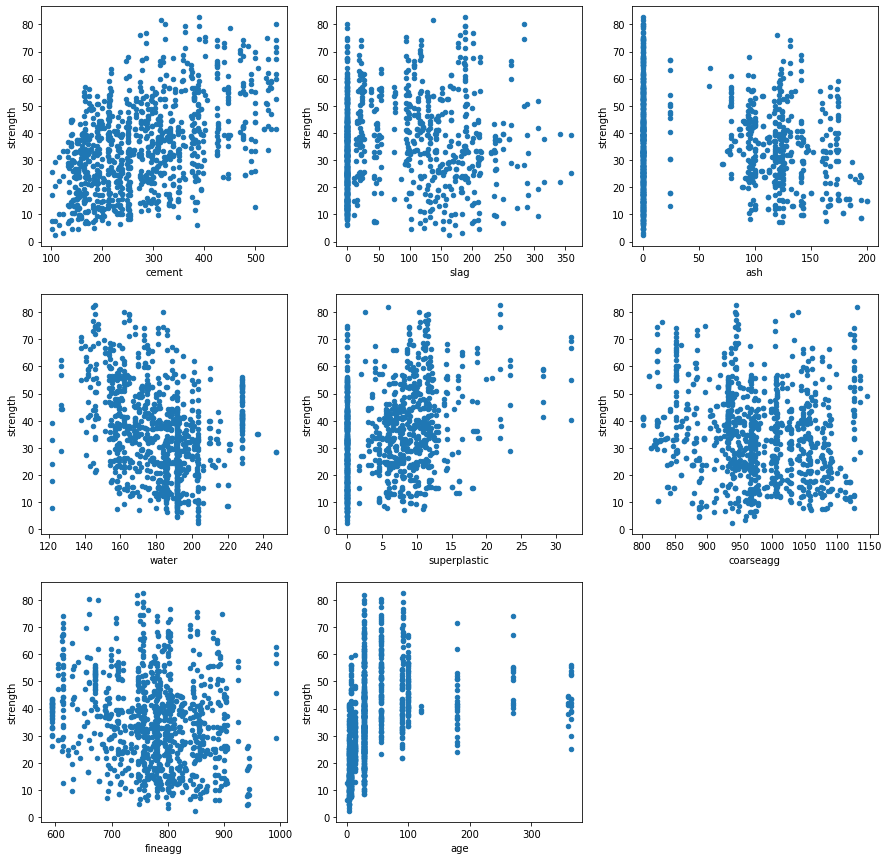

In [13]:
fig1 = plt.figure(figsize=(15, 15))
#fig1.subplots_adjust(hspace=2.5, wspace=0.5)
i=1
for name in concdf.drop('strength',axis=1).columns.tolist():
    ax = fig1.add_subplot(3, 3, i)
    concdf.plot.scatter(x=name,y='strength',ax=ax)
    i=i+1
plt.show()

Cement vs Strength : Plot shows there is some kind of positive linear relaionship between Cement and Strength. The relation is                      not very strong hence Cement alone is a weak predictor of the Strength.

Slag vs Strength : Plot doesnot show any linear relationship between Slag and Strength. The Slag value when 0 and other values 
                   shows similar pattern. Slag is not a good predictor of Strength.

Ash vs Strength : Plot doesnot show any linear relationship between Ash and Strength. The Ash value when 0 and other higher 
                  values shows similar pattern. Ash is not a good predictor of Strength.
                  
Water vs Strength : Plot doesnot show any linear relationship between Water and Strength. Water is not a good predictor of 
                    Strength.
                    
SuperPlastic vs Strength : Plot doesnot show any linear relationship between SuperPlastic and Strength. SuperPlastic is not a 
                           good predictor of Strength.
                           
Coarseagg vs Strength : Plot doesnot show any linear relationship between Coarseagg and Strength. Coarseagg is not a 
                           good predictor of Strength. 
                           
Fineagg vs Strength : Plot doesnot show any linear relationship between Fineagg and Strength. Fineagg is not a 
                      good predictor of Strength. 
                      

Age vs Strength: Plot doesnot show any linear relationship between Age and Strength. For one value of age there are multiple 
                 values of Strength. Hence cannot be used as predictor as it would create confusion of which strength to be consider.
                           

# Multi Variate Analysis

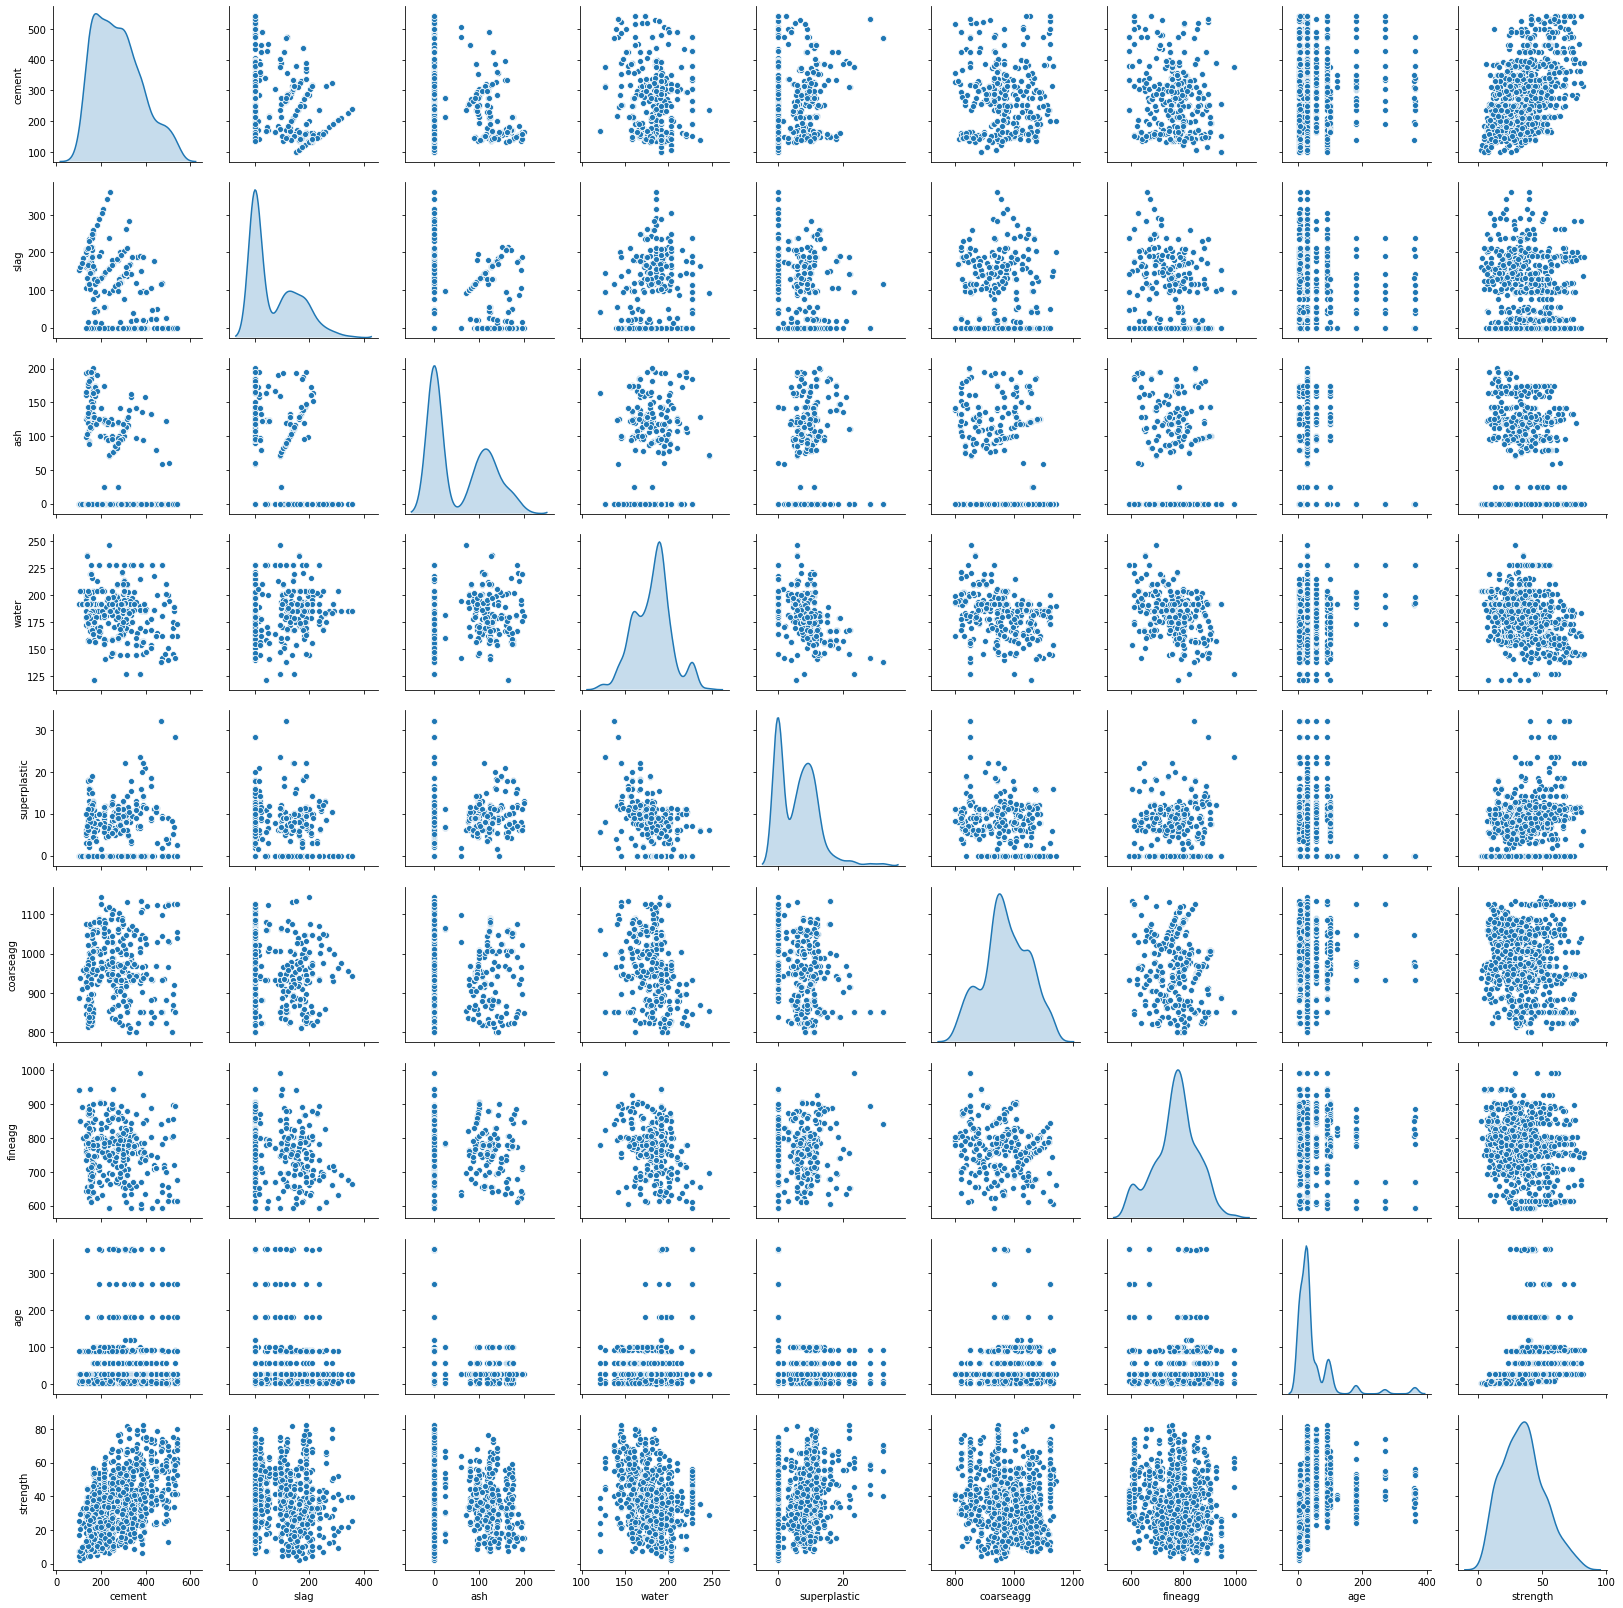

In [14]:
sns.pairplot(concdf, diag_kind='kde')
plt.show()

In [15]:
concdf.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


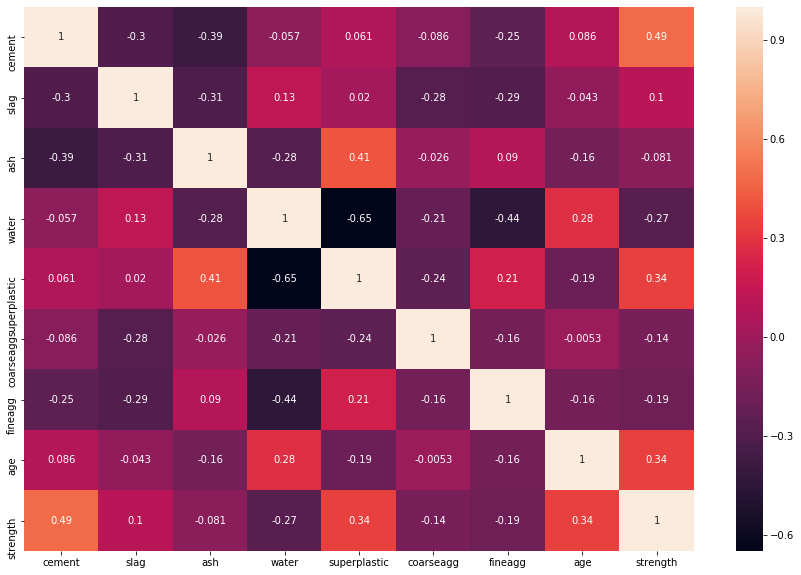

In [16]:
fig1 = plt.figure(figsize=(15, 10))
df_corr=concdf.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Cement vs other attributes : There is a slight negative correlation between cement and slag and ash.

Slag vs other attributes: There is slight negative correlation between slag and ash.

Ash vs other attributes: There is slight positive correlation betweenn ash and water.

Water vs other attributes: There is slight negative correlation between water and superplastic and also water and fineagg.

Superplastic vs other attributes: There is slight positive correlation betweenn Superplastic and strength.

coarseagg vs other attributes: There is not much correlation between coarseagga and other attributes

fineagg vs other attributes:There is not much correlation between fineagg and other attributes

Age vs other attribute: Age is slight positive correlated with strength.


There is no strong linear relationship between any of the attributes also individually all attributes are weak predictors.

Treat Outliers by replacing with mean

In [17]:
concdf_new=concdf.copy()

In [21]:
#Replacing outliers with median value
Q3=concdf_new['slag'].quantile(q=0.75)
Q1=concdf_new['slag'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
if concdf_new[ concdf_new['slag'] >o1].empty==False:
    concdf_new['slag']=np.where( (concdf_new['slag'] >o1),concdf_new['slag'].median(),concdf_new.slag)
elif concdf_new[concdf_new['slag'] <o2].empty==False:
    concdf_new['slag']=np.where( (concdf_new['slag'] <o2),concdf_new['slag'].median(),concdf_new.slag)
    
Q3=concdf_new['water'].quantile(q=0.75)
Q1=concdf_new['water'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
if concdf_new[ concdf_new['water'] >o1].empty==False:
    concdf_new['water']=np.where( (concdf_new['water'] >o1),concdf_new['water'].median(),concdf_new.water)
elif concdf_new[concdf_new['slag'] <o2].empty==False:
    concdf_new['water']=np.where( (concdf_new['water'] <o2),concdf_new['water'].median(),concdf_new.water)

Q3=concdf_new['superplastic'].quantile(q=0.75)
Q1=concdf_new['superplastic'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
if concdf_new[ concdf_new['superplastic'] >o1].empty==False:
    concdf_new['superplastic']=np.where( (concdf_new['superplastic'] >o1),concdf_new['superplastic'].median(),concdf_new.superplastic)
elif concdf_new[concdf_new['superplastic'] <o2].empty==False:
    concdf_new['superplastic']=np.where( (concdf_new['superplastic'] <o2),concdf_new['superplastic'].median(),concdf_new.superplastic)
    
Q3=concdf_new['fineagg'].quantile(q=0.75)
Q1=concdf_new['fineagg'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
if concdf_new[ concdf_new['fineagg'] >o1].empty==False:
    concdf_new['fineagg']=np.where( (concdf_new['fineagg'] >o1),concdf_new['fineagg'].median(),concdf_new.fineagg)
elif concdf_new[concdf_new['fineagg'] <o2].empty==False:
    concdf_new['fineagg']=np.where( (concdf_new['fineagg'] <o2),concdf_new['fineagg'].median(),concdf_new.fineagg)
    
Q3=concdf_new['age'].quantile(q=0.75)
Q1=concdf_new['age'].quantile(q=0.25)
IQR=Q3-Q1
o1=(Q3+1.5*IQR)
o2=(Q1-1.5*IQR)
if concdf_new[ concdf_new['age'] >o1].empty==False:
    concdf_new['age']=np.where( (concdf_new['age'] >o1),concdf_new['age'].median(),concdf_new.age)
elif concdf_new[concdf_new['age'] <o2].empty==False:
    concdf_new['age']=np.where( (concdf_new['age'] <o2),concdf_new['age'].median(),concdf_new.age)    

In [22]:
#Validatig outliers presence post treating 
for name in concdf_new.drop('strength',axis=1).columns.tolist():
    Q3=concdf_new[name].quantile(q=0.75)
    Q1=concdf_new[name].quantile(q=0.25)
    IQR=Q3-Q1
    ol=np.count_nonzero(concdf_new[name]<(Q1-1.5*IQR)) + np.count_nonzero(concdf_new[name]>(Q3+1.5*IQR))
    print('There are {} outliers in the {} data'.format(ol,name))

There are 0 outliers in the cement data
There are 0 outliers in the slag data
There are 0 outliers in the ash data
There are 0 outliers in the water data
There are 0 outliers in the superplastic data
There are 0 outliers in the coarseagg data
There are 0 outliers in the fineagg data
There are 0 outliers in the age data


In [23]:
X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

Normalizing data with Min max scaler

In [24]:
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
X_MMScaled = min_max_scaler.fit_transform(X) 
Standardisation = StandardScaler() 
X_Std = Standardisation.fit_transform(X) 

Feature Engineering with PCA for three variables (Normalized, Scaled & Original)

PCA explained_variance_ratio_ {} [0.31307287 0.17213015 0.14145654 0.13201247 0.10836089 0.10475225
 0.02371698 0.00449786]


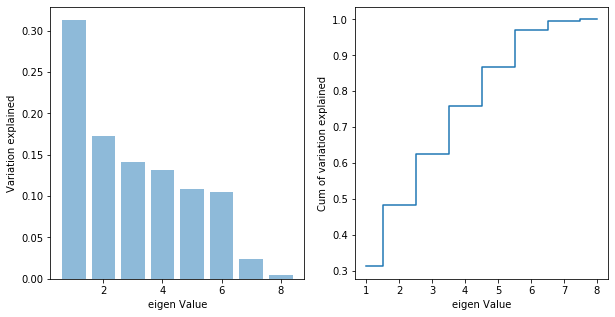

PCA explained_variance_ratio_ {} [0.27952664 0.18138381 0.15087086 0.13523623 0.12089947 0.10204073
 0.02528216 0.0047601 ]


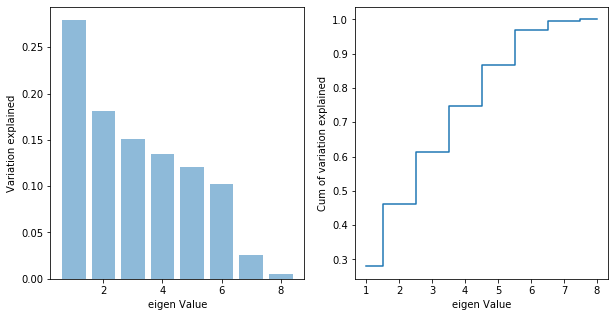

PCA explained_variance_ratio_ {} [3.67869407e-01 2.73865559e-01 1.93664033e-01 1.20518936e-01
 3.60917623e-02 5.40344305e-03 2.29116855e-03 2.95690805e-04]


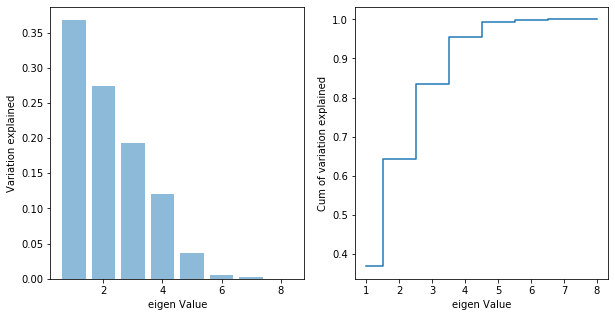

In [25]:
for i in [X_MMScaled,X_Std,X]:
    covMatrix = np.cov(i,rowvar=False)
    #print(covMatrix)
    pca = PCA(n_components=8)
    pca.fit(i)
    #print(pca.explained_variance_)# eigen values
    #print(pca.components_) #eigen vector
    print('PCA explained_variance_ratio_ {}',pca.explained_variance_ratio_)
    fig2 = plt.figure(figsize=(10, 5))
    ax1 = fig2.add_subplot(121)
    plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
    plt.ylabel('Variation explained')
    plt.xlabel('eigen Value')
    ax2 = fig2.add_subplot(122)
    plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.ylabel('Cum of variation explained')
    plt.xlabel('eigen Value')
    plt.show()

For Normalized and scaled data 95% of data is explained by n=6 and with the original data 95% is explained by n=5

Gaussian Analysis:

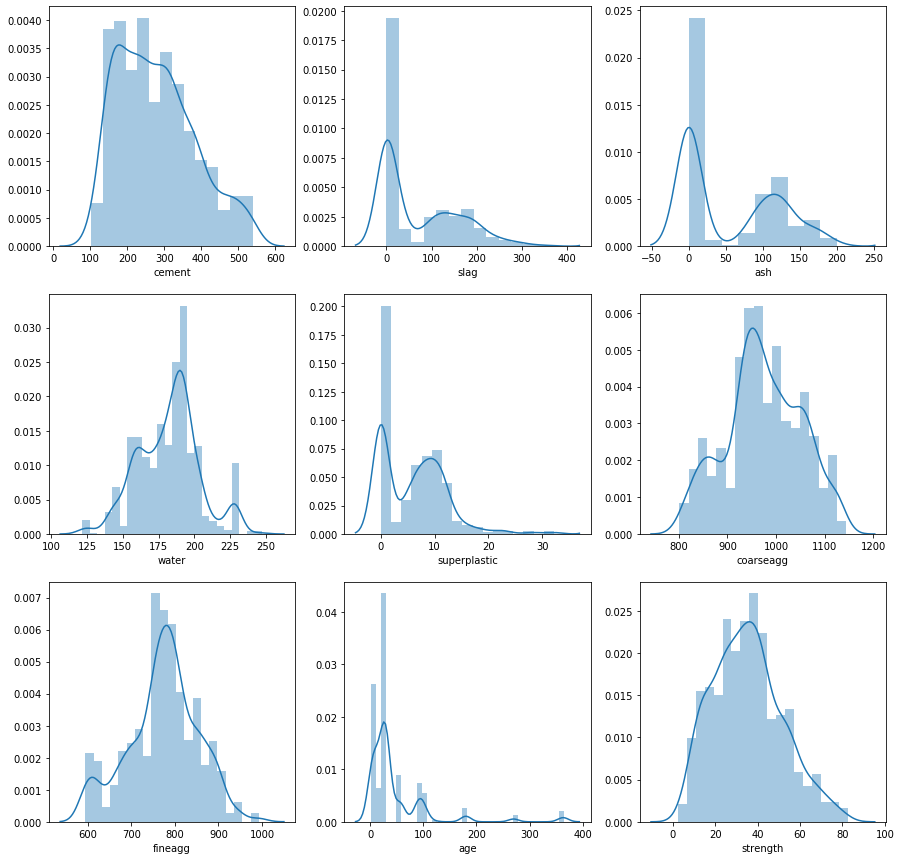

In [26]:
fig3 = plt.figure(figsize=(15, 15))
i=1
for name in concdf.columns.tolist():
    ax = fig3.add_subplot(3, 3, i)
    sns.distplot(concdf[name])
    i=i+1
plt.show()

Cement Attribute has 3 Gaussians and is slightly right skewed.

Slag Attribute has 2 Gaussians and is highly right skewed.

Ash Attribute has 2 Gaussians and is right skewed.

Water Attribute has 4 Gaussians and is left skewed.

Superplastic Attribute has 2 Gaussians and is highly right skewed.

Coarseagg Attribute has 3 Gaussians .

Fineagg Attribute has 5 Gaussians and is slightly left skewed.

Age Attribute has 5 Gaussians and is highly right skewed.

Strength Target Attribute has 3 Gaussians

Linear Regression:

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_LRMM = Pipeline([('scl', StandardScaler()), ('pca', PCA()),('lr', LinearRegression())]) 
param_grid = {'scl__copy':[True,False],'scl__with_mean':[True,False],'scl__with_std':[True,False],'pca__n_components':[2,3,4,5,6,7],"lr__fit_intercept": [True,False]} 
gridMM = GridSearchCV( pipe_LRMM , param_grid = param_grid, cv = 5) 
gridMM.fit( X_train, y_train) 
LRMM_best_score=gridMM.best_score_
LRMM_val_score=gridMM.score( X_val, y_val)
print("\nBest cross-validation accuracy for Linear Regression with Standard Scaler: {:.3f}". format( LRMM_best_score*100)) 
print("Best parameters for Linear Regression with Standard Scaler: ", gridMM.best_params_) 
print("Val set accuracy: {:.3f}". format(LRMM_val_score*100 ))


Best cross-validation accuracy for Linear Regression with Standard Scaler: 71.200
Best parameters for Linear Regression with Standard Scaler:  {'lr__fit_intercept': True, 'pca__n_components': 6, 'scl__copy': True, 'scl__with_mean': False, 'scl__with_std': False}
Val set accuracy: 66.168


In [290]:
# Linear Regression with best parameters.

results=pd.DataFrame(columns=['Model', 'Model_Score','Mean_Square_Error','Mean_Absolute_Error','Explained_Variance_Score'])

Standardisation = StandardScaler(copy=True,with_mean=False,with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

lin_regression_model_best = LinearRegression(fit_intercept= True)
lin_regression_model_best.fit(X_train, y_train)
print('\nBest Linear Regression score for val set with PCA: {:0.3f}'.format(lin_regression_model_best.score(X_Val, y_val)*100))
print('Best Linear Regression Score for test set with PCA: {:0.3f}'.format(lin_regression_model_best.score(X_test, y_test)*100))

y_predict=lin_regression_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=lin_regression_model_best.score(X_test, y_test)*100

print("\nThe coefficient of model with PCA is {}".format( lin_regression_model_best.coef_))
    
intercept = lin_regression_model_best.intercept_[0]
print("\nThe intercept of model with PCA is {}".format(intercept))

results.loc[0]=['LinearRegression with PCA',s,mse,mae,evs]

X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

lin_regression_model_best = LinearRegression(fit_intercept= True)
lin_regression_model_best.fit(X_train, y_train)
print('\nBest Linear Regression score for val set without PCA: {:0.3f}'.format(lin_regression_model_best.score(X_Val, y_val)*100))
print('Best Linear Regression Score for test set without PCA: {:0.3f}'.format(lin_regression_model_best.score(X_test, y_test)*100))

y_predict=lin_regression_model_best.predict(X_test)
r2score=(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=lin_regression_model_best.score(X_test, y_test)*100

print("\nThe coefficient of model without PCA is {}".format( lin_regression_model_best.coef_))
    
intercept = lin_regression_model_best.intercept_[0]
print("\nThe intercept of model without PCA is {}".format(intercept))


results.loc[1]=['LinearRegression without PCA',s,mse,mae,evs]

results


Best Linear Regression score for val set with PCA: 74.741
Best Linear Regression Score for test set with PCA: 68.044

The coefficient of model with PCA is [[ 0.05748842  0.03805559 -0.02168074  0.02048696 -0.20292451  0.62169572]]

The intercept of model with PCA is 35.45357705233785

Best Linear Regression score for val set without PCA: 75.026
Best Linear Regression Score for test set without PCA: 68.453

The coefficient of model without PCA is [[ 0.11319268  0.09067025  0.04439822 -0.12461582  0.12490979  0.01750549
   0.01661143  0.62171292]]

The intercept of model without PCA is -27.610681260862663


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796


Linear regression with K fold

In [292]:
num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(lin_regression_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=lin_regression_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[2]=['Linear Regression with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(lin_regression_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=lin_regression_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[3]=['Linear Regression without PCA & with K fold',s,mse,mae,evs]
results


Average accuracy with PCA :  66.93191324165446
Average accuracy without PCA :  66.97107121241503


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796


Linear Regression with polynomial features:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)

pipe_PLRMM = Pipeline([('scl',  StandardScaler() ),('poly',PolynomialFeatures()), ('pca', PCA()), ('plr', LinearRegression())]) 
param_grid = {'scl__copy':[True,False],'scl__with_mean':[True,False],'scl__with_std':[True,False],
              'pca__n_components':[2,3,4,5,6,7],"poly__degree":[2,3,4],"plr__fit_intercept": [True,False]} 
gridPMM = GridSearchCV( pipe_PLRMM , param_grid = param_grid, cv = 5) 
gridPMM.fit( X_train, y_train) 
PLRMM_best_score=gridPMM.best_score_
PLRMM_val_score=gridPMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for Polynomial Linear Regression with Standard Scaler: {:.3f}". format( PLRMM_best_score*100)) 
print(" Best parameters for Polynomial Linear Regression with Standard Scaler: ", gridPMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(PLRMM_val_score*100 ))



 Best cross-validation accuracy for Polynomial Linear Regression with Standard Scaler: 71.901
 Best parameters for Polynomial Linear Regression with Standard Scaler:  {'pca__n_components': 7, 'plr__fit_intercept': True, 'poly__degree': 3, 'scl__copy': True, 'scl__with_mean': False, 'scl__with_std': False}
 Val set accuracy: 66.716


In [293]:
# Plynomial Linear Regression with best parameters.

Standardisation = StandardScaler(copy=True,with_mean=False,with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_lin_regression_model_best = LinearRegression(fit_intercept= True)
poly_lin_regression_model_best.fit(X_train2, y_train)
print('\nBest Polynomial Linear Regression score with PCA for val set: {:0.3f}'.format(poly_lin_regression_model_best.score(X_val2, y_val)*100))
print('Best Polynomial Linear Regression Score with PCA for test set : {:0.3f}'.format(poly_lin_regression_model_best.score(X_test2, y_test)*100))

y_predict=poly_lin_regression_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_lin_regression_model_best.score(X_test2, y_test)*100

results.loc[4]=['Polynomial LinearRegression with PCA',s,mse,mae,evs]

print("\nThe coefficient of model with PCA is {}".format( poly_lin_regression_model_best.coef_))
    
intercept = poly_lin_regression_model_best.intercept_[0]
print("\nThe intercept of model with PCA is {}".format(intercept))



X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_lin_regression_model_best = LinearRegression(fit_intercept= True)
poly_lin_regression_model_best.fit(X_train2, y_train)
print('\nBest Polynomial Linear Regression score without PCA for val set: {:0.3f}'.format(poly_lin_regression_model_best.score(X_val2, y_val)*100))
print('Best Polynomial Linear Regression Score without PCA for test set : {:0.3f}'.format(poly_lin_regression_model_best.score(X_test2, y_test)*100))

print("\nThe coefficient of model without PCA is {}".format( poly_lin_regression_model_best.coef_))
    
intercept = poly_lin_regression_model_best.intercept_[0]
print("\nThe intercept of model without PCA is {}".format(intercept))


y_predict=poly_lin_regression_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_lin_regression_model_best.score(X_test2, y_test)*100

results.loc[5]=['Polynomial LinearRegression without PCA',s,mse,mae,evs]
results


Best Polynomial Linear Regression score with PCA for val set: 85.238
Best Polynomial Linear Regression Score with PCA for test set : 79.657

The coefficient of model with PCA is [[ 2.75383153e+07  3.27312469e-02 -7.02559001e-03 -9.51030899e-03
  -3.39863555e-02 -2.76078094e-01  7.37278044e-01 -2.90455663e-02
  -1.04759766e-04  2.42067214e-05  1.05392065e-05  8.64536684e-05
  -3.67234543e-04  2.32552141e-04  2.38178010e-03 -1.36133998e-04
  -1.99071271e-04  1.81799604e-04 -3.25346360e-05  9.53751667e-04
   7.52039780e-04 -1.94838181e-04  3.75175776e-05 -2.72095425e-04
  -4.41771995e-04 -2.74588877e-04 -3.77958562e-04  7.77056064e-04
  -1.37904944e-03 -3.88905166e-04  1.21151330e-03 -4.75903610e-03
  -3.82982051e-03 -1.87202489e-02 -7.34483181e-03 -1.30753202e-02
   7.17344220e-07  1.92538773e-06  4.41963275e-07 -1.73864021e-06
  -1.54531194e-06 -4.69288740e-06  3.29940210e-06  2.16322417e-07
  -8.52117173e-07 -1.18745345e-06 -4.02001359e-06  1.98221266e-06
  -1.92775880e-05  1.39244348

,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572


Polynimial regression with K fold

In [294]:
num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_lin_regression_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_lin_regression_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[6]=['Polynomial LinearRegression with PCA & K fold',s,mse,mae,evs]



kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_lin_regression_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)


y_predict=poly_lin_regression_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[7]=['Polynomial LinearRegression without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  67.02572830553284
Average accuracy without PCA :  66.97107121241503


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572


Ridge with ploynomial

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_RDMM = Pipeline([('scl', StandardScaler()),('poly',PolynomialFeatures()), ('pca', PCA()), ('rd', Ridge())]) 
param_grid = {'scl__with_std':[True,False],'pca__n_components':[2,3,4,5,6,7],'poly__degree':[1,2,3,4]
             ,'rd__solver': ['auto', 'svd','cholesky','lsqr','sparse_cg']
             ,'rd__alpha':np.random.uniform(0,1,10)} 
gridRDMM = GridSearchCV( pipe_RDMM , param_grid = param_grid, cv = 5) 
gridRDMM.fit( X_train, y_train) 
RDMM_best_score=gridRDMM.best_score_
RDMM_val_score=gridRDMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for Ridge with Standard Scaler : {:.3f}". format( RDMM_best_score*100)) 
print(" Best parameters for Ridge with Standard Scaler: ", gridRDMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(RDMM_val_score*100 ))


 Best cross-validation accuracy for Ridge with Standard Scaler : 71.200
 Best parameters for Ridge with Standard Scaler:  {'pca__n_components': 6, 'poly__degree': 1, 'rd__alpha': 0.92422926658506, 'rd__solver': 'lsqr', 'scl__with_std': False}
 Val set accuracy: 66.168


In [295]:
# Ridge with best parameter

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_ridge_model_best = Ridge(alpha= 0.92422926658506,solver='lsqr')
poly_ridge_model_best.fit(X_train2, y_train)
print('\nBest Ridge score with PCA for val set: {:0.3f}'.format(poly_ridge_model_best.score(X_val2, y_val)*100))
print('Best Ridge Score with PCA for test set : {:0.3f}'.format(poly_ridge_model_best.score(X_test2, y_test)*100))

print("\nThe coefficient of model with PCA is {}".format( poly_ridge_model_best.coef_))
    
intercept = poly_ridge_model_best.intercept_[0]
print("\nThe intercept of model with PCA is {}".format(intercept))

y_predict=poly_ridge_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_ridge_model_best.score(X_test2, y_test)*100

results.loc[8]=['Ridge with PCA',s,mse,mae,evs]

X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_ridge_model_best = Ridge(alpha= 0.92422926658506,solver='lsqr')
poly_ridge_model_best.fit(X_train2, y_train)
print('\nBest Ridge score without PCA for val set: {:0.3f}'.format(poly_ridge_model_best.score(X_val2, y_val)*100))
print('Best Ridge Score without PCA for test set : {:0.3f}'.format(poly_ridge_model_best.score(X_test2, y_test)*100))

print("\nThe coefficient of model without PCA is {}".format( poly_ridge_model_best.coef_))
    
intercept = poly_ridge_model_best.intercept_[0]
print("\nThe intercept of model without PCA is {}".format(intercept))

y_predict=poly_ridge_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_ridge_model_best.score(X_test2, y_test)*100

results.loc[9]=['Ridge without PCA',s,mse,mae,evs]
results


Best Ridge score with PCA for val set: 74.741
Best Ridge Score with PCA for test set : 68.044

The coefficient of model with PCA is [[ 0.          0.05748842  0.03805562 -0.02168073  0.02048695 -0.20292435
   0.62168888]]

The intercept of model with PCA is 35.45358018521468

Best Ridge score without PCA for val set: 74.914
Best Ridge Score without PCA for test set : 68.540

The coefficient of model without PCA is [[ 0.          0.11243682  0.09023823  0.04503648 -0.13890346  0.06524564
   0.01567355  0.01470186  0.62390971]]

The intercept of model without PCA is 35.45444533224338


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Ridge with K folds

In [296]:
num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_ridge_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_ridge_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[10]=['Ridge with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_ridge_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_ridge_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[11]=['Ridge without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  66.93191999302447
Average accuracy without PCA :  67.01758494327868


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Lasso with ploynomial

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_LDMM = Pipeline([('scl', StandardScaler()),('poly',PolynomialFeatures()), ('pca', PCA()), ('ld', Lasso())]) 
param_grid = {'scl__copy':[True,False],'scl__with_mean':[True,False],'scl__with_std':[True,False],
              'pca__n_components':[2,3,4,5,6,7],'poly__degree':[1,2,3,4]
             ,'ld__selection': ['cyclic', 'random']
             ,'ld__alpha':np.random.uniform(0,1,10)} 
gridLDMM = GridSearchCV( pipe_LDMM , param_grid = param_grid, cv = 5) 
gridLDMM.fit( X_train, y_train) 
LDMM_best_score=gridLDMM.best_score_
LDMM_val_score=gridLDMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for Lasso with Standard Scaler: {:.3f}". format( LDMM_best_score*100)) 
print(" Best parameters for Lasso  with Standard Scaler: ", gridLDMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(LDMM_val_score*100 ))


 Best cross-validation accuracy for Lasso with Standard Scaler: 71.901
 Best parameters for Lasso  with Standard Scaler:  {'ld__alpha': 0.10088919905199467, 'ld__selection': 'cyclic', 'pca__n_components': 7, 'poly__degree': 3, 'scl__copy': True, 'scl__with_mean': False, 'scl__with_std': False}
 Val set accuracy: 66.716


In [297]:
Standardisation = StandardScaler(copy=True,with_mean=False,with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_Lasso_model_best = Lasso(alpha=0.10088919905199467,selection='cyclic')
poly_Lasso_model_best.fit(X_train2, y_train)
print('\nBest Lasso score for val set with PCA: {:0.3f}'.format(poly_Lasso_model_best.score(X_val2, y_val)*100))
print('Best Lasso Score for test set with PCA: {:0.3f}'.format(poly_Lasso_model_best.score(X_test2, y_test)*100))

print("\nThe coefficients of model with PCA : {}".format( poly_Lasso_model_best.coef_))
    
intercept = poly_Lasso_model_best.intercept_[0]
print("\nThe intercept of model with PCA is {}".format(intercept))


y_predict=poly_Lasso_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_Lasso_model_best.score(X_test2, y_test)*100

results.loc[12]=['Lasso with PCA',s,mse,mae,evs]



X_train, X_test, y_train, y_test = train_test_split(X_Std ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_Lasso_model_best = Lasso(alpha=0.10088919905199467,selection='cyclic')
poly_Lasso_model_best.fit(X_train2, y_train)
print('\nBest Lasso score for val set without PCA: {:0.3f}'.format(poly_Lasso_model_best.score(X_val2, y_val)*100))
print('Best Lasso Score for test set without PCA: {:0.3f}'.format(poly_Lasso_model_best.score(X_test2, y_test)*100))

print("\nThe coefficients of model without PCA : {}".format( poly_Lasso_model_best.coef_))
    
intercept = poly_Lasso_model_best.intercept_[0]
print("\nThe intercept of model without PCA is {}".format(intercept))

y_predict=poly_Lasso_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_Lasso_model_best.score(X_test2, y_test)*100

results.loc[13]=['Lasso without PCA',s,mse,mae,evs]

results


Best Lasso score for val set with PCA: 86.763
Best Lasso Score for test set with PCA: 79.933

The coefficients of model with PCA : [ 0.00000000e+00  3.23805564e-02 -6.54511169e-03 -9.27375412e-03
 -3.41481035e-02 -2.73127003e-01  7.13682997e-01 -0.00000000e+00
 -1.13430273e-04  1.19764576e-05  2.59593315e-05  1.07135464e-04
 -3.69585807e-04  2.64645604e-04  2.36912201e-03 -1.28329588e-04
 -1.94871860e-04  2.04300427e-04 -2.65838649e-05  9.38438446e-04
  7.96527235e-04 -1.87533752e-04  2.00178330e-05 -2.64160562e-04
 -4.11671108e-04 -2.65398212e-04 -3.73980568e-04  7.72617363e-04
 -1.46123412e-03 -3.32473518e-04  1.21122029e-03 -4.78924893e-03
 -3.83132237e-03 -1.92885125e-02 -7.79976108e-03 -1.30567202e-02
  7.85035792e-07  1.85365398e-06  2.81134493e-07 -1.63219294e-06
 -1.74828542e-06 -5.59412987e-06  9.53018336e-07  3.19144752e-07
 -1.16003526e-06 -1.10097491e-06 -4.34285186e-06  6.96235873e-07
 -1.77864912e-05 -5.67955905e-08  2.89220715e-07  1.34887455e-06
  8.52694594e-07 -5.510

,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [298]:
num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_Lasso_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_Lasso_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[14]=['Lasso with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_Lasso_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)


y_predict=poly_Lasso_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[15]=['Lasso without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  67.02895927300554
Average accuracy without PCA :  66.97480869991367


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


KNN Regressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_KNNMM = Pipeline([('scl', StandardScaler() )
                       ,('pca', PCA()), ('knn', KNeighborsRegressor())]) 
myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
param_grid = {'scl__with_std':[True,False],
              'pca__n_components':[2,3,4,5,6,7]
             ,'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
             ,'knn__metric': ['minkowski','euclidean','manhattan','chebyshev'],
              'knn__weights':['uniform', 'distance'],
              'knn__n_neighbors':list(filter(lambda x: x % 2 != 0, list(range(1,50))))
    
                      } 
gridKNNMM = GridSearchCV( pipe_KNNMM , param_grid = param_grid, cv = 5) 
gridKNNMM.fit( X_train, y_train) 
KNNMM_best_score=gridKNNMM.best_score_
KNNMM_val_score=gridKNNMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for KNN Regressor with Standard Scaler: {:.3f}". format( KNNMM_best_score*100)) 
print(" Best parameters for KNN Regressor with Standard Scaler: ", gridKNNMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(KNNMM_val_score*100 ))


 Best cross-validation accuracy for KNN Regressor with Standard Scaler: 75.931
 Best parameters for KNN Regressor with Standard Scaler:  {'knn__algorithm': 'ball_tree', 'knn__metric': 'minkowski', 'knn__n_neighbors': 9, 'knn__weights': 'distance', 'pca__n_components': 7, 'scl__with_std': True}
 Val set accuracy: 74.259


In [299]:
Standardisation = StandardScaler(with_std=True) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_KNeighborsRegressor_model_best = KNeighborsRegressor(algorithm='ball_tree',metric='minkowski',n_neighbors=9,weights='distance')
poly_KNeighborsRegressor_model_best.fit(X_train, y_train)
print('\nBest KNeighborsRegressor score for val set with PCA: {:0.3f}'.format(poly_KNeighborsRegressor_model_best.score(X_Val, y_val)*100))
print('Best KNeighborsRegressor Score for test set with PCA: {:0.3f}'.format(poly_KNeighborsRegressor_model_best.score(X_test, y_test)*100))


y_predict=poly_KNeighborsRegressor_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_KNeighborsRegressor_model_best.score(X_test, y_test)*100

results.loc[16]=['KNN with PCA',s,mse,mae,evs]


X_train, X_test, y_train, y_test = train_test_split(X_Std ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_KNeighborsRegressor_model_best = KNeighborsRegressor(algorithm='ball_tree',metric='minkowski',n_neighbors=9,weights='distance')
poly_KNeighborsRegressor_model_best.fit(X_train, y_train)
print('\nBest KNeighborsRegressor score for val set without PCA: {:0.3f}'.format(poly_KNeighborsRegressor_model_best.score(X_Val, y_val)*100))
print('Best KNeighborsRegressor Score for test set without PCA: {:0.3f}'.format(poly_KNeighborsRegressor_model_best.score(X_test, y_test)*100))


y_predict=poly_KNeighborsRegressor_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_KNeighborsRegressor_model_best.score(X_test, y_test)*100

results.loc[17]=['KNN without PCA',s,mse,mae,evs]

results


Best KNeighborsRegressor score for val set with PCA: 80.944
Best KNeighborsRegressor Score for test set with PCA: 69.301

Best KNeighborsRegressor score for val set without PCA: 80.813
Best KNeighborsRegressor Score for test set without PCA: 68.984


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [300]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_KNeighborsRegressor_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_KNeighborsRegressor_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[18]=['KNN with PCA & K fold',s,mse,mae,evs]

kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_KNeighborsRegressor_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_KNeighborsRegressor_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[19]=['KNN without PCA & with K fold',s,mse,mae,evs]

results


Average accuracy with PCA :  79.12790480797447
Average accuracy without PCA :  79.25213378140411


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


SVC

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_SVRMM = Pipeline([('scl', StandardScaler() ),('pca', PCA()),('svr', SVR())]) 
param_grid = {'scl__with_std':[True,False],
              'pca__n_components':[2,3,4,5,6,7]
             ,'svr__kernel': ['linear','rbf','sigmoid']
             ,'svr__gamma': np.random.uniform(0,1,5),
              'svr__C':np.random.uniform(0,1,5) 
                      } 
gridSVRMM = GridSearchCV( pipe_SVRMM , param_grid = param_grid, cv = 5) 
gridSVRMM.fit( X_train, y_train) 
SVRMM_best_score=gridSVRMM.best_score_
SVRMM_val_score=gridSVRMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for SVR Regressor with Standard Scaler: {:.3f}". format( SVRMM_best_score*100)) 
print(" Best parameters for SVR Regressor with Standard Scaler: ", gridSVRMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(SVRMM_val_score*100 ))


 Best cross-validation accuracy for SVR Regressor with Standard Scaler: 70.634
 Best parameters for SVR Regressor with Standard Scaler:  {'pca__n_components': 6, 'scl__with_std': False, 'svr__C': 0.31757467786380233, 'svr__gamma': 0.8318847808588317, 'svr__kernel': 'linear'}
 Val set accuracy: 64.235


In [301]:
Standardisation = StandardScaler(with_std=True) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_SVR_model_best = SVR(C=0.31757467786380233,gamma= 0.8318847808588317,kernel= 'linear')
poly_SVR_model_best.fit(X_train, y_train)
print('\nBest SVR score for val set with PCA: {:0.3f}'.format(poly_SVR_model_best.score(X_Val, y_val)*100))
print('Best SVR Score for test set with PCA: {:0.3f}'.format(poly_SVR_model_best.score(X_test, y_test)*100))

y_predict=poly_SVR_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_SVR_model_best.score(X_test, y_test)*100

results.loc[20]=['SVR Regressor with PCA',s,mse,mae,evs]


X_train, X_test, y_train, y_test = train_test_split(X_Std ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_SVR_model_best = SVR(C=0.31757467786380233,gamma= 0.8318847808588317,kernel= 'linear')
poly_SVR_model_best.fit(X_train, y_train)
print('\nBest SVR score for val set without PCA: {:0.3f}'.format(poly_SVR_model_best.score(X_Val, y_val)*100))
print('Best SVR Score for test set without PCA: {:0.3f}'.format(poly_SVR_model_best.score(X_test, y_test)*100))


y_predict=poly_SVR_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_SVR_model_best.score(X_test, y_test)*100

results.loc[21]=['SVR Regressor without PCA',s,mse,mae,evs]

results


Best SVR score for val set with PCA: 72.807
Best SVR Score for test set with PCA: 66.032

Best SVR score for val set without PCA: 75.147
Best SVR Score for test set without PCA: 68.857


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [302]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_SVR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_SVR_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100
results.loc[22]=['SVC with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_SVR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_SVR_model_best.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100
results.loc[23]=['SVC without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  65.14458185369817
Average accuracy without PCA :  68.46304588445255


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Decison Tree

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_DTMM = Pipeline([('scl', StandardScaler()),('pca', PCA()),('poly',PolynomialFeatures()), ('dtr', DecisionTreeRegressor())]) 
param_grid = {'scl__with_std':[True,False],
              'pca__n_components':[2,3,4,5,6,7],'poly__degree':[1,2,3,4],
              "dtr__criterion": ['mse','friedman_mse','mae'],
                  "dtr__splitter": ['best','random'],
                  "dtr__max_depth":list(range(1,10))} 
gridDTMM = GridSearchCV( pipe_DTMM , param_grid = param_grid, cv = 5) 
gridDTMM.fit( X_train, y_train) 
DTMM_best_score=gridDTMM.best_score_
DTMM_val_score=gridDTMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for Decision Tree Regressor with Standard Scaler: {:.3f}". format( DTMM_best_score*100)) 
print(" Best parameters for Decision Tree Regressor with Standard Scaler: ", gridDTMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(DTMM_val_score*100 ))


 Best cross-validation accuracy for Decision Tree Regressor with Standard Scaler: 72.938
 Best parameters for Decision Tree Regressor with Standard Scaler:  {'dtr__criterion': 'mae', 'dtr__max_depth': 8, 'dtr__splitter': 'best', 'pca__n_components': 6, 'poly__degree': 1, 'scl__with_std': False}
 Val set accuracy: 73.119


In [303]:
Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_DTR_model_best = DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=8,max_features='auto')
poly_DTR_model_best.fit(X_train2, y_train)
print('\nBest DecisionTreeRegressor score for val set with PCA: {:0.3f}'.format(poly_DTR_model_best.score(X_val2, y_val)*100))
print('Best DecisionTreeRegressor Score for test set with PCA : {:0.3f}'.format(poly_DTR_model_best.score(X_test2, y_test)*100))

print('Feature importances with PCA : \n',pd.DataFrame(poly_DTR_model_best.feature_importances_))

y_predict=poly_DTR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_DTR_model_best.score(X_test2, y_test)*100

results.loc[24]=['DecisionTreeRegressor with PCA',s,mse,mae,evs]



X_train, X_test, y_train, y_test = train_test_split(X_Std ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_DTR_model_best = DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=8,max_features='auto')
poly_DTR_model_best.fit(X_train2, y_train)
print('\nBest DecisionTreeRegressor score for val set without PCA: {:0.3f}'.format(poly_DTR_model_best.score(X_val2, y_val)*100))
print('Best DecisionTreeRegressor Score for test set without PCA : {:0.3f}'.format(poly_DTR_model_best.score(X_test2, y_test)*100))

print('Feature importances with PCA : \n',pd.DataFrame(poly_DTR_model_best.feature_importances_))

y_predict=poly_DTR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_DTR_model_best.score(X_test2, y_test)*100

results.loc[25]=['DecisionTreeRegressor without PCA',s,mse,mae,evs]
results


Best DecisionTreeRegressor score for val set with PCA: 80.386
Best DecisionTreeRegressor Score for test set with PCA : 69.301
Feature importances with PCA : 
           0
0  0.000000
1  0.153120
2  0.107270
3  0.044594
4  0.078284
5  0.312769
6  0.303963

Best DecisionTreeRegressor score for val set without PCA: 76.431
Best DecisionTreeRegressor Score for test set without PCA : 69.223
Feature importances with PCA : 
           0
0  0.000000
1  0.321325
2  0.109592
3  0.008070
4  0.135679
5  0.080912
6  0.045562
7  0.069344
8  0.229515


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [304]:
#kfold

X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_DTR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)


s=accuracy*100

results.loc[26]=['DecisionTree with PCA & K fold',s,mse,mae,evs]

kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_DTR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)


s=accuracy*100

results.loc[27]=['DecisionTree without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  75.05347305947078
Average accuracy without PCA :  74.43275705442268


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [305]:
#DecisionTreeRegressor with feature drop
X_new = concdf_new.drop(['strength','cement'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=5)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_DTR_model_best = DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=8,max_features='auto')
poly_DTR_model_best.fit(X_train2, y_train)
print('\nBest DecisionTreeRegressor score with feature drop & PCA for val set: {:0.3f}'.format(poly_DTR_model_best.score(X_val2, y_val)*100))
print('Best DecisionTreeRegressor Score with feature drop & PCA for test set : {:0.3f}'.format(poly_DTR_model_best.score(X_test2, y_test)*100))


y_predict=poly_DTR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_DTR_model_best.score(X_test2, y_test)*100

results.loc[28]=['DecisionTreeRegressor with feature drop & PCA',s,mse,mae,evs]


Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 


X_train, X_test, y_train, y_test = train_test_split(X_Std ,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly_DTR_model_best = DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=8,max_features='auto')
poly_DTR_model_best.fit(X_train2, y_train)
print('\nBest DecisionTreeRegressor score with feature drop & without PCA for val set: {:0.3f}'.format(poly_DTR_model_best.score(X_val2, y_val)*100))
print('Best DecisionTreeRegressor Score with feature drop & without PCA for test set : {:0.3f}'.format(poly_DTR_model_best.score(X_test2, y_test)*100))

y_predict=poly_DTR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_DTR_model_best.score(X_test2, y_test)*100

results.loc[29]=['DecisionTreeRegressor with feature drop & without PCA',s,mse,mae,evs]
results


Best DecisionTreeRegressor score with feature drop & PCA for val set: 75.137
Best DecisionTreeRegressor Score with feature drop & PCA for test set : 69.086

Best DecisionTreeRegressor score with feature drop & without PCA for val set: 74.414
Best DecisionTreeRegressor Score with feature drop & without PCA for test set : 68.073


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [306]:
#kfold with feeature removal
X_new = concdf_new.drop(['strength','cement'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=5)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_DTR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

s=accuracy*100

results.loc[30]=['DecisionTree with PCA & K fold and feature drop',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_DTR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)


s=accuracy*100

results.loc[31]=['DecisionTree without PCA & with K fold and feature drop',s,mse,mae,evs]
results

Average accuracy with PCA :  48.1232560957389
Average accuracy without PCA :  68.45667503381475


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Random Foret Regressor:

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)
pipe_RFMM = Pipeline([('scl', StandardScaler()),('pca', PCA()),('poly',PolynomialFeatures()), ('rfr', RandomForestRegressor())]) 
param_grid = {   'scl__with_std':[True,False],
                  'pca__n_components':[2,3,4,5,6,7],
                  'poly__degree':[1,2,3,4],
                   "rfr__criterion": ['mse','mae'],
                  "rfr__max_depth":list(range(1,10))
             }
gridRFMM = GridSearchCV( pipe_RFMM , param_grid = param_grid, cv = 5) 
gridRFMM.fit( X_train, y_train) 
RFMM_best_score=gridRFMM.best_score_
RFMM_val_score=gridRFMM.score(X_val, y_val)
print("\n Best cross-validation accuracy for Random Forest Regressor with Standard Scaler: {:.3f}". format( RFMM_best_score*100)) 
print(" Best parameters for Random Forest Regressor with Standard Scaler: ", gridRFMM.best_params_) 
print(" Val set accuracy: {:.3f}". format(RFMM_val_score*100 ))


 Best cross-validation accuracy for Random Forest Regressor with Standard Scaler: 81.174
 Best parameters for Random Forest Regressor with Standard Scaler:  {'pca__n_components': 6, 'poly__degree': 1, 'rfr__criterion': 'mse', 'rfr__max_depth': 8, 'scl__with_std': False}
 Val set accuracy: 82.488


In [307]:
Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 

pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_RFR_model_best = RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto')
poly_RFR_model_best.fit(X_train2, y_train)
print('\nBest Random Forest Regressor score with PCA for val set: {:0.3f}'.format(poly_RFR_model_best.score(X_val2, y_val)*100))
print('Best Random Forest Regressor Score with PCA for test set : {:0.3f}'.format(poly_RFR_model_best.score(X_test2, y_test)*100))

y_predict=poly_RFR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_RFR_model_best.score(X_test2, y_test)*100

results.loc[32]=['Random Forest Regressor with PCA',s,mse,mae,evs]



X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_RFR_model_best = RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto')
poly_RFR_model_best.fit(X_train2, y_train)
print('\nBest Random Forest Regressor score without PCA for val set: {:0.3f}'.format(poly_RFR_model_best.score(X_val2, y_val)*100))
print('Best Random Forest Regressor Score without PCA for test set : {:0.3f}'.format(poly_RFR_model_best.score(X_test2, y_test)*100))


y_predict=poly_RFR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_RFR_model_best.score(X_test2, y_test)*100

results.loc[33]=['Random Forest Regressor without PCA',s,mse,mae,evs]
results



Best Random Forest Regressor score with PCA for val set: 82.771
Best Random Forest Regressor Score with PCA for test set : 77.057

Best Random Forest Regressor score without PCA for val set: 84.432
Best Random Forest Regressor Score without PCA for test set : 78.171


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [308]:
#kfold
Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_RFR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_RFR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[34]=['Random Forest with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_RFR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_RFR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[35]=['Random Forest without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  77.32202608124621
Average accuracy without PCA :  78.14574130083464


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Gradient Boosting Regressor

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .30, random_state=0)

pipe_PGBR = Pipeline([('scl',  StandardScaler() ),('poly',PolynomialFeatures()), ('pca', PCA()), ('gbr', GradientBoostingRegressor())]) 
param_grid = {
              'pca__n_components':[2,3,4,5,6,7],
              "poly__degree":[2,3,4],
              "gbr__loss":['ls', 'lad', 'huber', 'quantile'],
              "gbr__criterion":['friedman_mse','mse','mae']
             } 
gridGBR = GridSearchCV( pipe_PGBR , param_grid = param_grid, cv = 5) 
gridGBR.fit( X_train, y_train) 
GBR_best_score=gridGBR.best_score_
GBR_val_score=gridGBR.score(X_val, y_val)
print("\n Best cross-validation accuracy for Gradient Boosting Regressor with Standard Scaler: {:.3f}". format( GBR_best_score*100)) 
print(" Best parameters for Gradient Boosting Regressor with Standard Scaler: ", gridGBR.best_params_) 
print(" Val set accuracy: {:.3f}". format(GBR_val_score*100 ))



 Best cross-validation accuracy for Gradient Boosting Regressor with Standard Scaler: 71.506
 Best parameters for Gradient Boosting Regressor with Standard Scaler:  {'gbr__criterion': 'mse', 'gbr__loss': 'ls', 'pca__n_components': 7, 'poly__degree': 3}
 Val set accuracy: 71.964


In [309]:
#BEST GRADIENT BOOSTING REGRESSOR

#best

X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       
pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

GBR_model_best = GradientBoostingRegressor(criterion='mse',loss='ls')
GBR_model_best.fit(X_train2, y_train)
print('\nBest Gradient Boosting Regressor score for val set with PCA: {:0.3f}'.format(GBR_model_best.score(X_val2, y_val)*100))
print('Best Gradient Boosting Regressor Score for test set with PCA: {:0.3f}'.format(GBR_model_best.score(X_test2, y_test)*100))

y_predict=GBR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=GBR_model_best.score(X_test2, y_test)*100

results.loc[36]=['Gradient Boosting Regressor with PCA',s,mse,mae,evs]


X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

GBR_model_best = GradientBoostingRegressor(criterion='mse',loss='ls')
GBR_model_best.fit(X_train2, y_train)
print('\nBest Gradient Boosting Regressor score for val set without PCA: {:0.3f}'.format(GBR_model_best.score(X_val2, y_val)*100))
print('Best Gradient Boosting Regressor Score for test set without PCA: {:0.3f}'.format(GBR_model_best.score(X_test2, y_test)*100))


y_predict=GBR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=GBR_model_best.score(X_test2, y_test)*100

results.loc[37]=['Gradient Boosting Regressor without PCA',s,mse,mae,evs]
results


Best Gradient Boosting Regressor score for val set with PCA: 84.702
Best Gradient Boosting Regressor Score for test set with PCA: 78.528

Best Gradient Boosting Regressor score for val set without PCA: 87.885
Best Gradient Boosting Regressor Score for test set without PCA: 82.906


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [310]:
#Kfold

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(GBR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=GBR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[38]=['Gradient Boosting Regressor with PCA & K fold',s,mse,mae,evs]



kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(GBR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=GBR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[39]=['Gradient Boosting Regressor PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  79.68803265868463
Average accuracy without PCA :  79.68767082085435


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Adaboosting Regressor

In [311]:
#Finding best Adaboosting Regressor
X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

algo=['lin_regression_model_best','poly_lin_regression_model_best','poly_ridge_model_best','poly_Lasso_model_best','poly_KNeighborsRegressor_model_best','poly_SVR_model_best','poly_DTR_model_best','poly_RFR_model_best','GBR_model_best']

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       


j=0
for i in [lin_regression_model_best,poly_lin_regression_model_best,poly_ridge_model_best,poly_Lasso_model_best,poly_KNeighborsRegressor_model_best,poly_SVR_model_best,poly_DTR_model_best,poly_RFR_model_best,GBR_model_best]:
    
    if (j==1 or j==3 or j==4 or j==8):
        n=7
    else:
        n=6
  
    pca = PCA(n_components=n)
    pca.fit(X_Std)
    X_Std_PCA=pca.transform(X_Std)
    
    if(j==1 or j==3 or j==8):
        d=3
    else:
        d=1
    
   
    X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
    X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)
    
    poly = PolynomialFeatures(degree=d)
    X_train2 = poly.fit_transform(X_train)
    X_val2 = poly.fit_transform(X_Val)
    X_test2 = poly.fit_transform(X_test)

    if (j==0 or j==4 or j==5 ):
        X=X_train
        X1=X_Val
        X2=X_test
    else:
        X=X_train2
        X1=X_val2
        X2=X_test2
 
    poly_ABR_model_best = AdaBoostRegressor(loss='square',base_estimator=i)
    poly_ABR_model_best.fit(X, y_train)
    print('\nBest Adaboosting Forest Regressor score for val set with {}: {:0.3f}'.format(algo[j],poly_ABR_model_best.score(X1, y_val)*100))
    print('Best Adaboosting Forest Regressor Score for test set with {} : {:0.3f}'.format(algo[j],poly_ABR_model_best.score(X2, y_test)*100))
    
    
    y_predict=poly_ABR_model_best.predict(X2)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)
    evs=explained_variance_score(y_test, y_predict)
    
    print('MSE Score with {} : {:0.3f}'.format(algo[j],mse))
    print('MAE Score with {} : {:0.3f}'.format(algo[j],mae))
    print('EVS Score with {} : {:0.3f}'.format(algo[j],evs))
    
    j=j+1

    


Best Adaboosting Forest Regressor score for val set with lin_regression_model_best: 72.350
Best Adaboosting Forest Regressor Score for test set with lin_regression_model_best : 64.487
MSE Score with lin_regression_model_best : 82.524
MAE Score with lin_regression_model_best : 7.439
EVS Score with lin_regression_model_best : 0.669

Best Adaboosting Forest Regressor score for val set with poly_lin_regression_model_best: 55.817
Best Adaboosting Forest Regressor Score for test set with poly_lin_regression_model_best : 41.467
MSE Score with poly_lin_regression_model_best : 136.017
MAE Score with poly_lin_regression_model_best : 7.994
EVS Score with poly_lin_regression_model_best : 0.430

Best Adaboosting Forest Regressor score for val set with poly_ridge_model_best: 72.186
Best Adaboosting Forest Regressor Score for test set with poly_ridge_model_best : 64.362
MSE Score with poly_ridge_model_best : 82.813
MAE Score with poly_ridge_model_best : 7.340
EVS Score with poly_ridge_model_best : 0

In [312]:
X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       
pca = PCA(n_components=7)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)


X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_ABR_model_best = AdaBoostRegressor(loss='square',base_estimator=poly_Lasso_model_best)
poly_ABR_model_best.fit(X_train2, y_train)
print('\nBest Adaboosting  Regressor score for val set with PCA: {:0.3f}'.format(poly_ABR_model_best.score(X_val2, y_val)*100))
print('Best Adaboosting  Regressor Score for test set with PCa: {:0.3f}'.format(poly_ABR_model_best.score(X_test2, y_test)*100))

y_predict=poly_ABR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_ABR_model_best.score(X_test2, y_test)*100

results.loc[40]=['Adaboosting  Regressor with PCA',s,mse,mae,evs]



Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       

X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=3)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_ABR_model_best = AdaBoostRegressor(loss='square',base_estimator=poly_Lasso_model_best)
poly_ABR_model_best.fit(X_train2, y_train)
print('\nBest Adaboosting  Regressor score for val set without PCA: {:0.3f}'.format(poly_ABR_model_best.score(X_val2, y_val)*100))
print('Best Adaboosting  Regressor Score for test set without PCA: {:0.3f}'.format(poly_ABR_model_best.score(X_test2, y_test)*100))

y_predict=poly_ABR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_ABR_model_best.score(X_test2, y_test)*100

results.loc[41]=['Adaboosting  Regressor without PCA',s,mse,mae,evs]
results


Best Adaboosting  Regressor score for val set with PCA: 88.564
Best Adaboosting  Regressor Score for test set with PCa: 82.432

Best Adaboosting  Regressor score for val set without PCA: 77.851
Best Adaboosting  Regressor Score for test set without PCA: 80.122


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [313]:
#kfold
Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_ABR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_ABR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[42]=['Adaboosting Regressor with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_ABR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_ABR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[43]=['Adaboosting Regressor without PCA & with K fold',s,mse,mae,evs]
results

Average accuracy with PCA :  58.90186205302309
Average accuracy without PCA :  58.41819311848


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


Bagging Regressor

In [314]:
#Finding best Bagging Regressor
X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

algo=['lin_regression_model_best','poly_lin_regression_model_best','poly_ridge_model_best','poly_Lasso_model_best','poly_KNeighborsRegressor_model_best','poly_SVR_model_best','poly_DTR_model_best','poly_RFR_model_best','GBR_model_best','poly_ABR_model_best']

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       

j=0
for i in [lin_regression_model_best,poly_lin_regression_model_best,poly_ridge_model_best,poly_Lasso_model_best,poly_KNeighborsRegressor_model_best,poly_SVR_model_best,poly_DTR_model_best,poly_RFR_model_best,GBR_model_best,poly_ABR_model_best]:
    
    if (j==1 or j==3 or j==4 or j==8):
        n=7
    else:
        n=6
  
    pca = PCA(n_components=n)
    pca.fit(X_Std)
    X_Std_PCA=pca.transform(X_Std)
    
    if(j==1 or j==3 or j==8):
        d=3
    else:
        d=1
    
   
    X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
    X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)
    
    poly = PolynomialFeatures(degree=d)
    X_train2 = poly.fit_transform(X_train)
    X_val2 = poly.fit_transform(X_Val)
    X_test2 = poly.fit_transform(X_test)

    if (j==0 or j==4 or j==5 ):
        X=X_train
        X1=X_Val
        X2=X_test
    else:
        X=X_train2
        X1=X_val2
        X2=X_test2
 
    poly_BR_model_best = BaggingRegressor(base_estimator=i)
    poly_BR_model_best.fit(X, y_train)
    print('\nBest Bagging Regressor score for val set with {}: {:0.3f}'.format(algo[j],poly_BR_model_best.score(X1, y_val)*100))
    print('Best Bagging Regressor Score for test set with {} : {:0.3f}'.format(algo[j],poly_BR_model_best.score(X2, y_test)*100))
    
    y_predict=poly_BR_model_best.predict(X2)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)
    evs=explained_variance_score(y_test, y_predict)
    
    print('MSE Score with {} : {:0.3f}'.format(algo[j],mse))
    print('MAE Score with {} : {:0.3f}'.format(algo[j],mae))
    print('EVS Score with {} : {:0.3f}'.format(algo[j],evs))
    
    j=j+1

    


Best Bagging Regressor score for val set with lin_regression_model_best: 74.962
Best Bagging Regressor Score for test set with lin_regression_model_best : 68.090
MSE Score with lin_regression_model_best : 74.150
MAE Score with lin_regression_model_best : 6.739
EVS Score with lin_regression_model_best : 0.684

Best Bagging Regressor score for val set with poly_lin_regression_model_best: 84.115
Best Bagging Regressor Score for test set with poly_lin_regression_model_best : 61.749
MSE Score with poly_lin_regression_model_best : 88.886
MAE Score with poly_lin_regression_model_best : 6.172
EVS Score with poly_lin_regression_model_best : 0.620

Best Bagging Regressor score for val set with poly_ridge_model_best: 74.824
Best Bagging Regressor Score for test set with poly_ridge_model_best : 68.098
MSE Score with poly_ridge_model_best : 74.134
MAE Score with poly_ridge_model_best : 6.706
EVS Score with poly_ridge_model_best : 0.682

Best Bagging Regressor score for val set with poly_Lasso_mode

In [315]:
#best

X = concdf_new.drop(['strength'], axis=1)
y = concdf_new[['strength']]

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X) 
       
pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

X_train, X_test, y_train, y_test = train_test_split(X_Std_PCA,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_BR_model_best = BaggingRegressor(base_estimator=poly_RFR_model_best)
poly_BR_model_best.fit(X_train2, y_train)
print('\nBest Bagging Regressor score for val set with PCA: {:0.3f}'.format(poly_BR_model_best.score(X_val2, y_val)*100))
print('Best Bagging Regressor Score for test set with PCA: {:0.3f}'.format(poly_BR_model_best.score(X_test2, y_test)*100))

y_predict=poly_BR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_BR_model_best.score(X_test2, y_test)*100

results.loc[44]=['Bagging Regressor with PCA',s,mse,mae,evs]

X_train, X_test, y_train, y_test = train_test_split(X_Std,y, test_size = 0.3, random_state = 1)
X_train, X_Val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 1)

poly = PolynomialFeatures(degree=1)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_Val)
X_test2 = poly.fit_transform(X_test)

poly_BR_model_best = BaggingRegressor(base_estimator=poly_RFR_model_best )
poly_BR_model_best.fit(X_train2, y_train)
print('\nBest Bagging Regressor score for val set without PCA: {:0.3f}'.format(poly_BR_model_best.score(X_val2, y_val)*100))
print('Best Bagging Regressor Score for test set without PCA: {:0.3f}'.format(poly_BR_model_best.score(X_test2, y_test)*100))

y_predict=poly_BR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=poly_BR_model_best.score(X_test2, y_test)*100

results.loc[45]=['Bagging Regressor without PCA',s,mse,mae,evs]
results



Best Bagging Regressor score for val set with PCA: 82.777
Best Bagging Regressor Score for test set with PCA: 78.533

Best Bagging Regressor score for val set without PCA: 86.277
Best Bagging Regressor Score for test set without PCA: 82.243


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [316]:
#Kfold

Standardisation = StandardScaler(with_std=False) 
X_Std = Standardisation.fit_transform(X_new) 

pca = PCA(n_components=6)
pca.fit(X_Std)
X_Std_PCA=pca.transform(X_Std)

num_folds = 50
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_BR_model_best,X_Std_PCA, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy with PCA : ',accuracy*100)

y_predict=poly_BR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[46]=['Bagging Regressor with PCA & K fold',s,mse,mae,evs]


kfold = KFold(n_splits=num_folds, random_state=seed)
r = cross_val_score(poly_BR_model_best,X_Std, y, cv=kfold)
accuracy=np.mean(abs(r))
print('Average accuracy without PCA : ',accuracy*100)

y_predict=poly_BR_model_best.predict(X_test2)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
evs=explained_variance_score(y_test, y_predict)
s=accuracy*100

results.loc[47]=['Bagging Regressor without PCA & with K fold',s,mse,mae,evs]
results


Average accuracy with PCA :  77.94885417713428
Average accuracy without PCA :  76.95515252686256


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
0,LinearRegression with PCA,68.043718,74.258812,6.715141,0.681741
1,LinearRegression without PCA,68.452938,73.307883,6.680828,0.685796
2,Linear Regression with PCA & K fold,66.931913,73.307883,6.680828,0.685796
3,Linear Regression without PCA & with K fold,66.971071,73.307883,6.680828,0.685796
4,Polynomial LinearRegression with PCA,79.656608,47.273213,5.449872,0.796880
5,Polynomial LinearRegression without PCA,-41.026656,327.712463,7.614803,-0.403572
6,Polynomial LinearRegression with PCA & K fold,67.025728,327.712463,7.614803,-0.403572
7,Polynomial LinearRegression without PCA & with...,66.971071,327.712463,7.614803,-0.403572
8,Ridge with PCA,68.043712,74.258826,6.715152,0.681741
9,Ridge without PCA,68.539557,73.106599,6.671308,0.686660


In [326]:
mx=results['Model_Score'].max()
evs=results['Explained_Variance_Score'].max()
print('Best model according to model Score is :')
results[results['Model_Score']== mx]

print('Best model which has EVS near to 1 is :')
results[results['Explained_Variance_Score']== evs]

Best model according to model Score is :
Best model which has EVS near to 1 is :


,Model,Model_Score,Mean_Square_Error,Mean_Absolute_Error,Explained_Variance_Score
37,Gradient Boosting Regressor without PCA,82.906007,39.722381,4.952858,0.830275
38,Gradient Boosting Regressor with PCA & K fold,79.688033,39.722381,4.952858,0.830275
39,Gradient Boosting Regressor PCA & with K fold,79.687671,39.722381,4.952858,0.830275


From the above results set Gradient Bossting without PCA is giving the better performance.
We use the sampling technique to get the CI for the model.

In [350]:
#Sampling
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_GBR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    GBR = GradientBoostingRegressor(n_estimators=50,criterion='mse', loss='ls') 
    GBR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = GBR.score(test[:, :-1] , y_test)
    predictions = GBR.predict(test[:, :-1])  

    sc_GBR.append(score)

In [352]:
#Sampling for Bagging 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_BR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    BR = BaggingRegressor(n_estimators=50,base_estimator=poly_RFR_model_best) 
    BR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = BR.score(test[:, :-1] , y_test)
    predictions = BR.predict(test[:, :-1])  

    sc_BR.append(score)

In [354]:
#Sampling for Random Forest  
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_RFR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    RFR = RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto',n_estimators=50)
    RFR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = RFR.score(test[:, :-1] , y_test)
    predictions = RFR.predict(test[:, :-1])  

    sc_RFR.append(score)

In [360]:
#Sampling for Adaboosting 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_ABR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    ABR =  AdaBoostRegressor(loss='square',base_estimator=poly_Lasso_model_best,n_estimators=50) 
    ABR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = ABR.score(test[:, :-1] , y_test)
    predictions = ABR.predict(test[:, :-1])  

    sc_ABR.append(score)

In [361]:
#Sampling for Lasso 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_LR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    LR =  Lasso(alpha=0.10088919905199467,selection='cyclic')
    LR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = LR.score(test[:, :-1] , y_test)
    predictions = LR.predict(test[:, :-1])  

    sc_LR.append(score)

In [362]:
#Sampling for Linear 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_L = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    L =  LinearRegression(fit_intercept= True)
    L.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = L.score(test[:, :-1] , y_test)
    predictions = L.predict(test[:, :-1])  

    sc_L.append(score)

In [363]:
#Sampling for ridge 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_RR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    RR =  Ridge(alpha= 0.92422926658506,solver='lsqr')
    RR.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = RR.score(test[:, :-1] , y_test)
    predictions = RR.predict(test[:, :-1])  

    sc_RR.append(score)

In [366]:
#Sampling for KNN 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_KNN = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    KNN =  KNeighborsRegressor(algorithm='ball_tree',metric='minkowski',n_neighbors=9,weights='distance')
    KNN.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = KNN.score(test[:, :-1] , y_test)
    predictions = KNN.predict(test[:, :-1])  

    sc_KNN.append(score)

In [370]:
#Sampling for SVR 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_SVR = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    SV =  SVR(C=0.31757467786380233,gamma= 0.8318847808588317,kernel= 'linear')
    SV.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = SV.score(test[:, :-1] , y_test)
    predictions = SV.predict(test[:, :-1])  

    sc_SVR.append(score)

In [371]:
#Sampling for DT 
concrete_XY = X.join(y)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concdf_new))    

sc_DT = list()   
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])        
    DT =  DecisionTreeRegressor(criterion='mae',splitter='best',max_depth=8,max_features='auto')
    DT.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    

    score = DT.score(test[:, :-1] , y_test)
    predictions = DT.predict(test[:, :-1])  

    sc_DT.append(score)

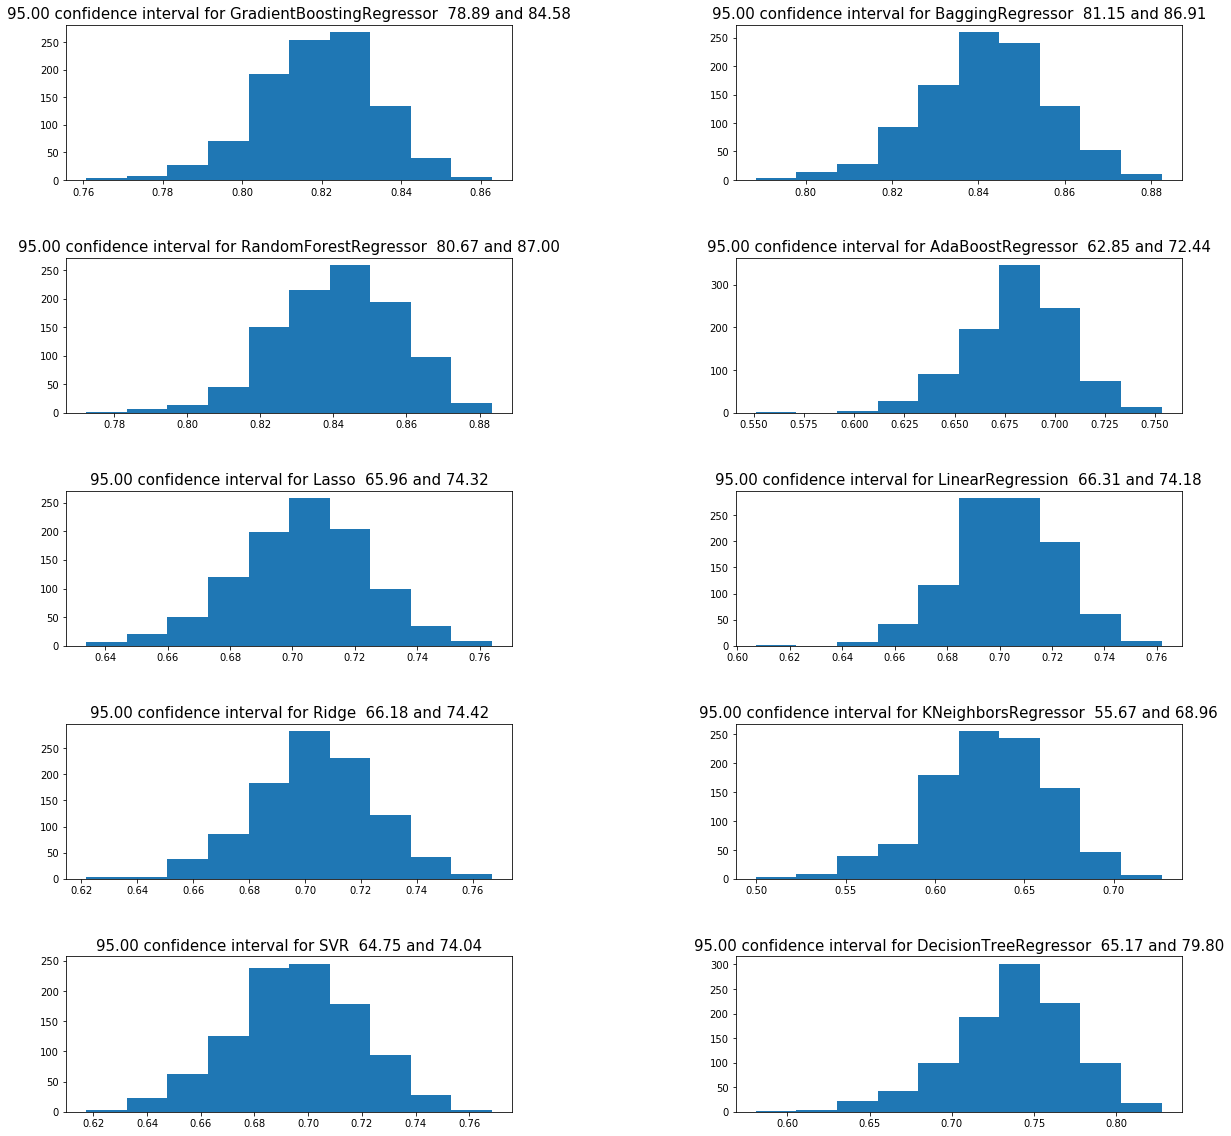

In [398]:
algo=['GradientBoostingRegressor','BaggingRegressor','RandomForestRegressor','AdaBoostRegressor','Lasso','LinearRegression','Ridge','KNeighborsRegressor','SVR','DecisionTreeRegressor']
j=0
k=1
fig4 = plt.figure(figsize=(20, 20))
fig4.subplots_adjust(hspace=0.5, wspace=0.5)
for i in [sc_GBR,sc_BR,sc_RFR,sc_ABR,sc_LR,sc_L,sc_RR,sc_KNN,sc_SVR,sc_DT]:
    ax = fig4.add_subplot(5, 2, k)
    plt.hist(i)
    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(i, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(i, p))
    t='{:0.2f} confidence interval for {}  {:0.2f} and {:0.2f}'.format(alpha*100, algo[j],lower*100, upper*100)
    pyplot.title(t,fontsize=15)
    j=j+1
    k=k+1
    
plt.show()

Conclusion:

From the above model performance range Random Forest model performs better.